In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/philchodrow/Documents/teaching/ml-notes/source':
  os.chdir(r'/Users/philchodrow/Documents/teaching/ml-notes/source')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/xn/wvbwvw0d6dx46h9_2bkrknnw0000gn/T/ipykernel_54050/949127318.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/importlib/_bootstrap_external.py": 1669300367.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/codecs.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/aliases.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/__init__.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/utf_8.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/encodings/latin_1.py": 1669300368.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/abc.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/io.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3.9/stat.py": 1669300365.0, "/Users/philchodrow/opt/anaconda3/envs/ml-0451/lib/python3

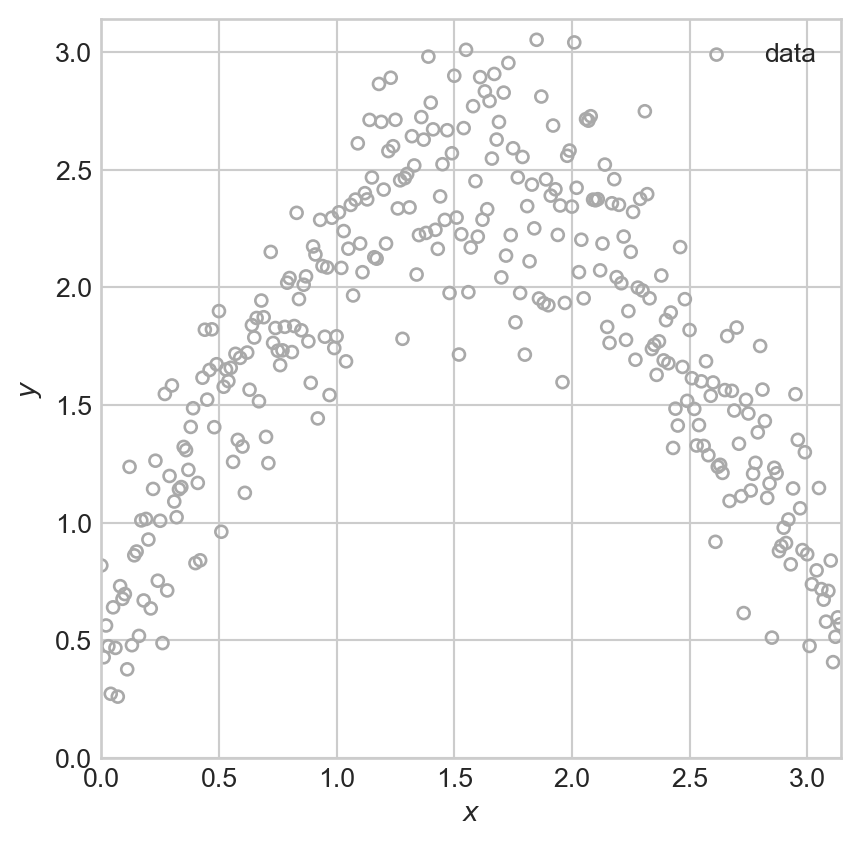

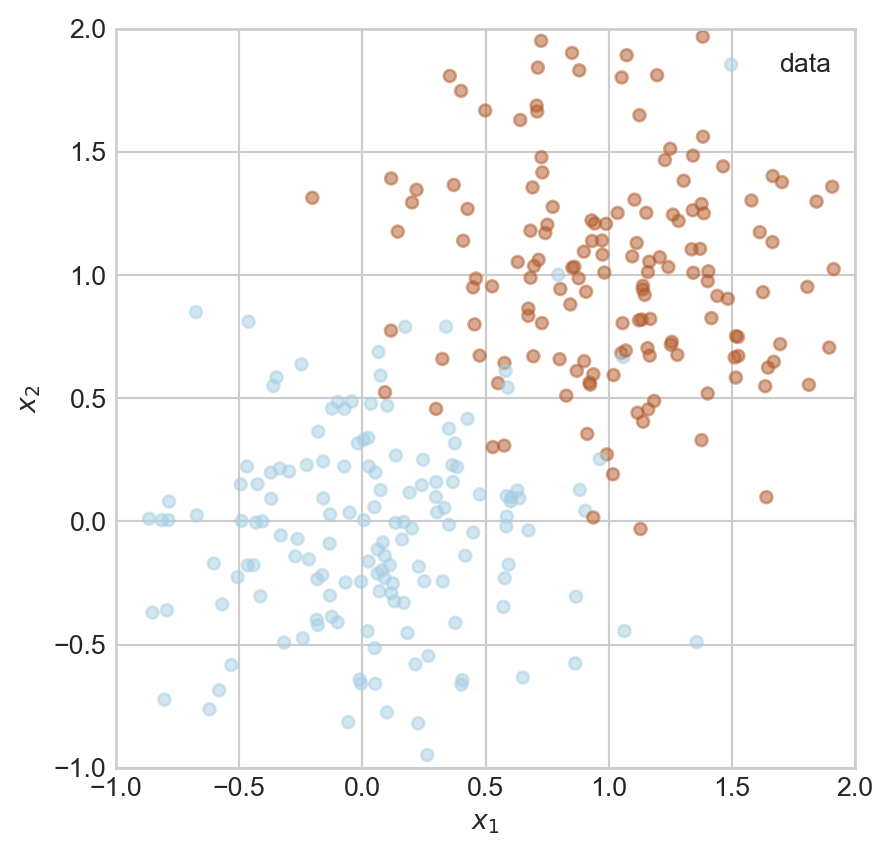

In [2]:
#| label: fig-examples
#| fig-cap: Examples of data with visualizable patterns.
#| fig-subcap:
#|   - Example data in which we can seek a pattern in the value of $y$ based on the value of $x$. This task is called  **regression**.
#|   - 'Example data in which we can seek a pattern in the **category** of a data point (represented by color) based on the value of two variables, $x_1$ and $x_2$. This task is called **classification.**'
#| layout-ncol: 2

import torch as tt
from matplotlib import pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

def plot_fig(pattern = False):

    # panel 1: regression

    noise = 0.3

    x = tt.arange(0, tt.pi, 0.01)
    y = 2*tt.sin(x) + 0.5
    y_noise = y + tt.normal(0.0, noise, size = (len(x),))

    plt.scatter(x, y_noise, s = 20,  facecolors='none', edgecolors = "darkgrey", label = "data")
    if pattern: 
        plt.plot(x, y, label = "pattern", linestyle = "--", color = "black", zorder = 10)
    plt.gca().set(xlabel = r"$x$", ylabel = r"$y$")
    plt.gca().set_xlim(-0, tt.pi)
    plt.gca().set_ylim(-0, tt.pi)
    plt.gca().set_aspect('equal')
    plt.legend()
    plt.show()

    # panel 2: classification

    noise = 0.4
    n_points = 300
    x = tt.Tensor([[0, 0], [1, 1]]).repeat(int(n_points/2),1) 
    x = x + tt.normal(0.0, noise, size = x.size())
    y = tt.Tensor([0, 1]).repeat(int(n_points/2))


    plt.scatter(x[:,0], x[:,1], s = 20, alpha = 0.5, c = y, facecolors = "none", cmap = "Paired", label = "data")

    if pattern: 
        plt.plot([-0.5, 1.5], [1.5, -0.5], label = "pattern", linestyle = "--", color = "black", zorder = 10)
    plt.legend()
    plt.gca().set(xlabel = r"$x_1$", ylabel = r"$x_2$")
    plt.gca().set_xlim(-1.0, 2.0)
    plt.gca().set_ylim(-1.0, 2.0)
    plt.gca().set_aspect('equal')
    plt.show()

plot_fig()

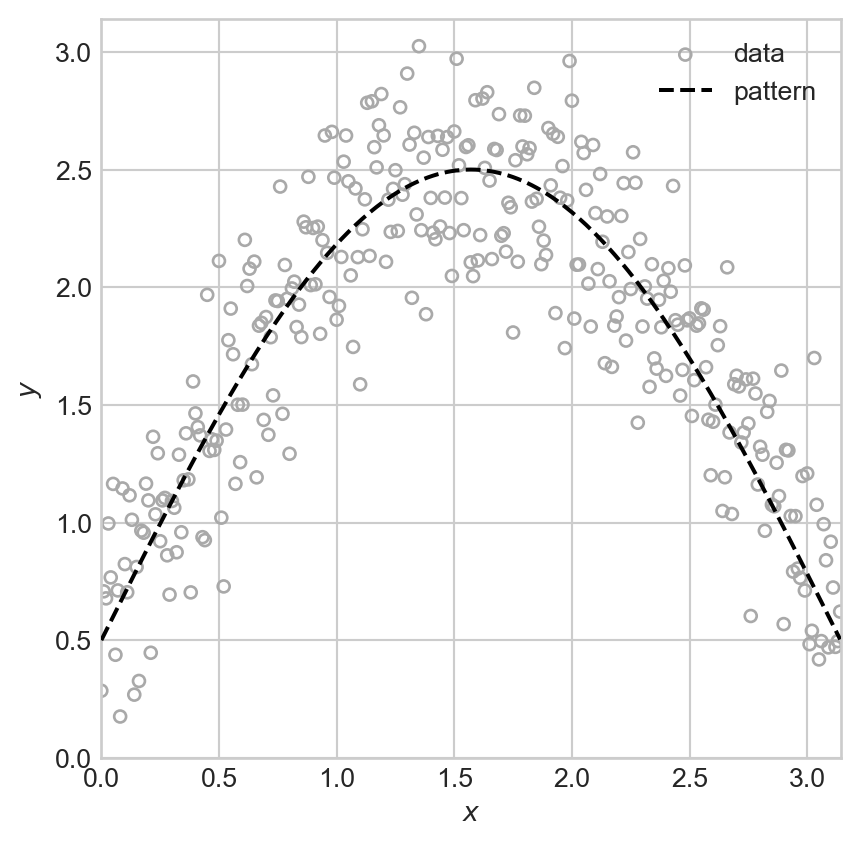

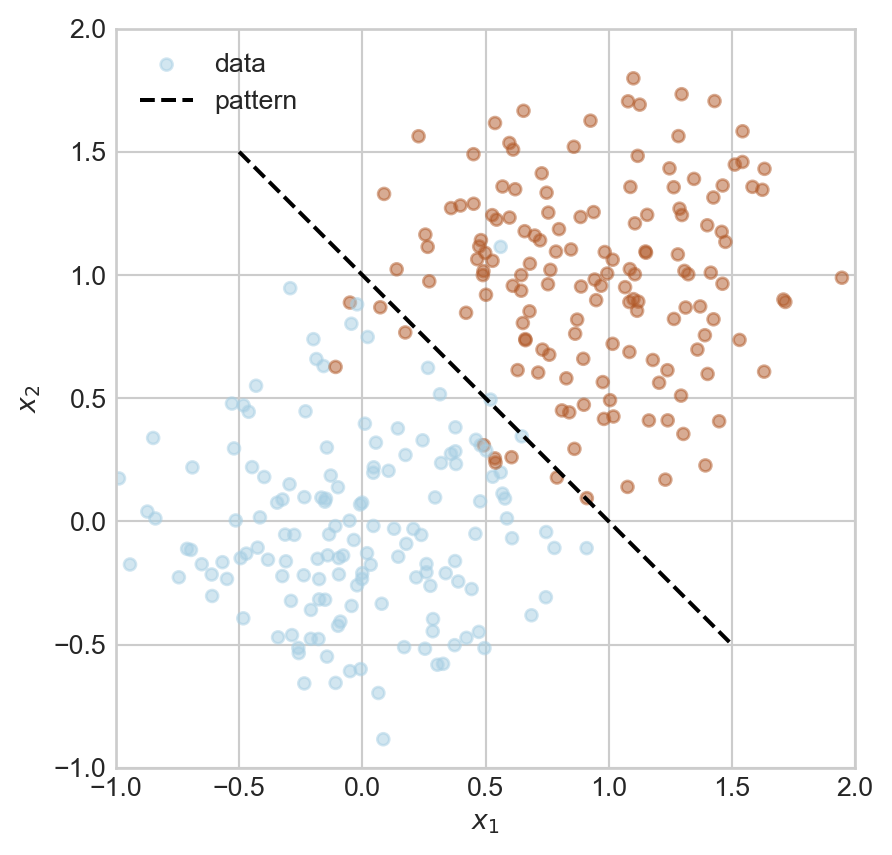

In [3]:
#| label: fig-examples-with-patterns
#| fig-cap: Examples of patterns in data.
#| fig-subcap:
#|   - 'As above, with a plot of the function $f(x) = 2\sin{x} + \frac{1}{2}$.'
#|   - 'As above, with a plot of the function $g(x_1) = 1 - x_1$. This plot is the same as the affine subspace defined by the equation $x_1 + x_2 = 1$.'
#| layout-ncol: 2
plot_fig(pattern = True)

In [4]:
#| code-fold: false 

#+-+
import pandas as pd
df = pd.read_csv("../data/palmer-penguins.csv")
#+-+

In [5]:
#| code-fold: false

#+-+
df
#+-+

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [6]:
#| code-fold: false

#+-+
df.groupby(["Species"]).size()
#+-+

Species
Adelie Penguin (Pygoscelis adeliae)          152
Chinstrap penguin (Pygoscelis antarctica)     68
Gentoo penguin (Pygoscelis papua)            124
dtype: int64

In [7]:
#| code-fold: false
df["Species"] = df["Species"].str.split().str.get(0) 
df = df[df["Species"] != "Chinstrap"]
df = df[["Species", "Culmen Length (mm)", "Flipper Length (mm)"]] 
df["label"] = df["Species"] == "Adelie"
df.dropna()

,Species,Culmen Length (mm),Flipper Length (mm),label
0,Adelie,39.1,181.0,True
1,Adelie,39.5,186.0,True
2,Adelie,40.3,195.0,True
4,Adelie,36.7,193.0,True
5,Adelie,39.3,190.0,True
...,...,...,...,...
338,Gentoo,47.2,214.0,False
340,Gentoo,46.8,215.0,False
341,Gentoo,50.4,222.0,False
342,Gentoo,45.2,212.0,False


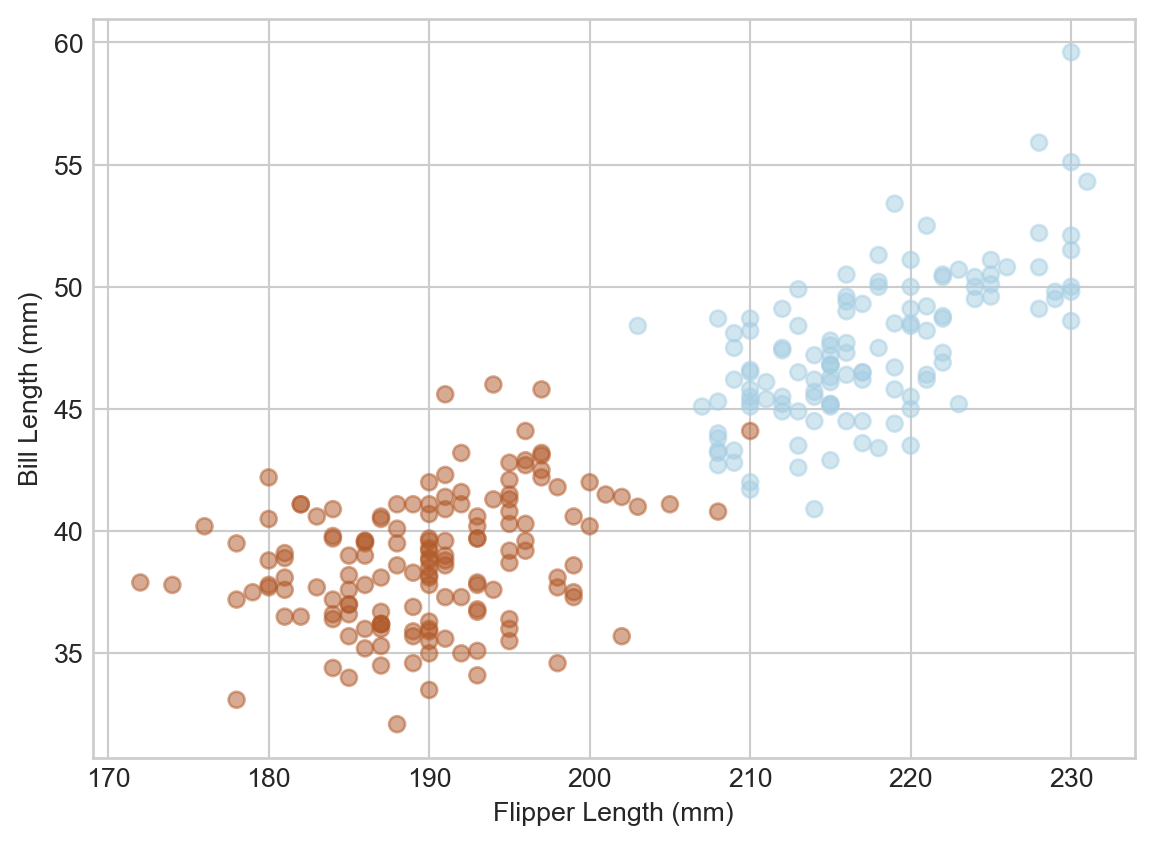

In [8]:
#| code-fold: false
fig, ax = plt.subplots(1, 1)

ax.scatter(df["Flipper Length (mm)"], df["Culmen Length (mm)"], c = df["label"], cmap = "Paired", facecolors = "none", alpha = 0.5)
labs = ax.set(xlabel = "Flipper Length (mm)", ylabel = "Bill Length (mm)")